In [71]:
import sqlite3
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import string

#NLTK
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [72]:
import sqlite3
from pandas import DataFrame

class basis_data:
    def __init__(self, nama):
        self.nama = nama
        
    def open_connect(self):
        self.connection = sqlite3.connect(self.nama)
        
    def show_data(self):
        query = 'SELECT Kompascom FROM kompas'
        cursor = self.connection.cursor()
        cursor.execute(query)
        hasil = cursor.fetchall()
        cursor.close()
        return hasil
    
    def close_connect(self):
        self.connection.commit()
        self.connection.close()
    
database = 'tweet_berita.db'
data = basis_data(database)
data.open_connect()
hasil = data.show_data() 

In [73]:
hasil

[('Dalam draf sementara, Revisi UU Pemilu menyebut pilkada serentak mulai 2027. Namun, sejumlah partai tetap menginginkan tetap di 2024. https://t.co/kNQXTGmiNy',),
 ('"Sudah waktunya angka ini kita upayakan bersama untuk segera turun," kata Wiku https://t.co/TF8hK5Gabv',),
 ('Eiger adalah salah satu merek perlengkapan outdoor dalam negeri yang relatif terkenal. Meski demikian, sebenarnya tak cuma Eiger yang menjadi merek lokal perlengkapan outdoor yang terkenal. | #Lifestyle https://t.co/lKPvoUvS2V',),
 ('PSSI resmi menetapkan Kongres Tahunan PSSI 2021 yang akan diselenggarakan secara tatap muka pada 29 Mei 2021. https://t.co/NU0JAEJMaw',),
 ('Fabio Quartararo memutuskan menjadi pebalap usai melihat Rossi mengendarai motor YZR-M1 2004 dan sukses menjadi juara dunia MotoGP pada tahun itu. https://t.co/RkdBBTGBMD',),
 ('Penguasa pasar di Indonesia, yakni merek Jepang, justru terkesan belum berbicara banyak soal rencana masuk ke pasar motor listrik. https://t.co/JtJH8DwT4J',),
 ('Di teng

In [74]:
df = DataFrame (hasil,columns=['Isi Berita'])

df

,Isi Berita
0,"Dalam draf sementara, Revisi UU Pemilu menyebu..."
1,"""Sudah waktunya angka ini kita upayakan bersam..."
2,Eiger adalah salah satu merek perlengkapan out...
3,PSSI resmi menetapkan Kongres Tahunan PSSI 202...
4,Fabio Quartararo memutuskan menjadi pebalap us...
...,...
95,Paus Fransiskus akan bertemu dengan pemuka Syi...
96,Bukti bayar jalan tol beralih ke digital. http...
97,Polisi akan menyelidiki kasus temuan bangkai k...
98,"Dari hasil pemeriksaan yang dilakukan polisi, ..."


In [75]:
with pd.ExcelWriter('berita kompas.xlsx') as writer:  
        df.to_excel(writer, sheet_name='berita kompas')

In [76]:
def low(text):
        return text.lower()

def removenumber(text):
        return  re.sub(r"\d+", "", text)

def removepunct(text):
        return text.translate(str.maketrans("","",string.punctuation))

def removewhitespace(text):
        return text.strip()
    
def remove_url(text):
        return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b' , '', text, flags=re.MULTILINE)

def tokenizekalimat(text):
        return sent_tokenize(text)
    
def tokenizekata(text):
        return word_tokenize(text)
    
def remove_tweet_special(text):
        text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
        text = text.encode('ascii', 'replace').decode('ascii')
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split()) 
        
def remove_urlless(text):
        return text.replace("http://", " ").replace("https://", " ")             
        

def stopwordss(kalimat):
    list_baru = ['yang','di','ke','dan','untuk','pada','dari','ini','ke','ada','indonesia', 'salah', 'terkait']
    list_stopwords = set(stopwords.words('indonesian'))
    list(list_stopwords).append(list_baru)
    list_stopwords = set(list(list_stopwords))
    return ' '.join([w for w in kalimat if not w in list_stopwords])
    
    
def stemming(text):
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        return stemmer.stem(text)


In [77]:
text = df['Isi Berita'].apply(low)
text = text.apply(remove_url)
text = text.apply(removenumber)
text = text.apply(removepunct)
text = text.apply(remove_tweet_special)
text = text.apply(remove_urlless)
text = text.apply(tokenizekata)
text1 = text.apply(stopwordss)

text1

0     draf revisi uu pemilu menyebut pilkada serenta...
1                             angka upayakan turun wiku
2     eiger salah merek perlengkapan outdoor negeri ...
3     pssi resmi menetapkan kongres tahunan pssi dis...
4     fabio quartararo memutuskan pebalap rossi meng...
                            ...                        
95    paus fransiskus bertemu pemuka syiah agung aya...
96                bukti bayar jalan tol beralih digital
97    polisi menyelidiki temuan bangkai kepala kucin...
98    hasil pemeriksaan polisi peristiwa bocah menge...
99    dpo korupsi mubassir mengaku kabur palu kendar...
Name: Isi Berita, Length: 100, dtype: object

In [78]:
text1 = ' '.join(text1)

In [79]:
text1

'draf revisi uu pemilu menyebut pilkada serentak partai angka upayakan turun wiku eiger salah merek perlengkapan outdoor negeri relatif terkenal eiger merek lokal perlengkapan outdoor terkenal lifestyle pssi resmi menetapkan kongres tahunan pssi diselenggarakan tatap muka mei fabio quartararo memutuskan pebalap rossi mengendarai motor yzrm sukses juara dunia motogp penguasa pasar indonesia merek jepang terkesan berbicara rencana masuk pasar motor listrik pandemi motormotor lawas usianya tua harganya stabil habis tahap sosialisasi ditentukan tilang diberlakukan kota xiaomi permintaan maafnya pembeli asli poco m transaksinya dibatalkan flash sale januari pubg mobile kunjung dirilis diblokir india salah pengembang menelurkan fearless and united guards gantinya konsumen dipaksa metode bayar sistem lazada mengarahkan pembayaran poco m metode cod otomatis penyakit jantung koroner disebabkan penumpukan timbunan plak dinding arteri koroner jantung kondisi disebabkan feng shui mendekorasi rumah

In [80]:
import itertools
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [81]:
kata = word_tokenize(text1)
kata

['draf',
 'revisi',
 'uu',
 'pemilu',
 'menyebut',
 'pilkada',
 'serentak',
 'partai',
 'angka',
 'upayakan',
 'turun',
 'wiku',
 'eiger',
 'salah',
 'merek',
 'perlengkapan',
 'outdoor',
 'negeri',
 'relatif',
 'terkenal',
 'eiger',
 'merek',
 'lokal',
 'perlengkapan',
 'outdoor',
 'terkenal',
 'lifestyle',
 'pssi',
 'resmi',
 'menetapkan',
 'kongres',
 'tahunan',
 'pssi',
 'diselenggarakan',
 'tatap',
 'muka',
 'mei',
 'fabio',
 'quartararo',
 'memutuskan',
 'pebalap',
 'rossi',
 'mengendarai',
 'motor',
 'yzrm',
 'sukses',
 'juara',
 'dunia',
 'motogp',
 'penguasa',
 'pasar',
 'indonesia',
 'merek',
 'jepang',
 'terkesan',
 'berbicara',
 'rencana',
 'masuk',
 'pasar',
 'motor',
 'listrik',
 'pandemi',
 'motormotor',
 'lawas',
 'usianya',
 'tua',
 'harganya',
 'stabil',
 'habis',
 'tahap',
 'sosialisasi',
 'ditentukan',
 'tilang',
 'diberlakukan',
 'kota',
 'xiaomi',
 'permintaan',
 'maafnya',
 'pembeli',
 'asli',
 'poco',
 'm',
 'transaksinya',
 'dibatalkan',
 'flash',
 'sale',
 'ja

In [89]:
import nltk
list_stopwords = set(stopwords.words('indonesian'))
list_stopwords = list(list_stopwords)
new_words=('salah','terkait', 'indonesia')
for i in new_words:
    list_stopwords.append(i)
    
print(list_stopwords) 


['belumlah', 'pertanyaan', 'soalnya', 'mungkin', 'pihak', 'dijelaskan', 'ingin', 'seenaknya', 'maka', 'tidaklah', 'berkali-kali', 'sampai', 'seolah-olah', 'buat', 'dimungkinkan', 'meski', 'menyiapkan', 'ditegaskan', 'persoalan', 'ujar', 'asalkan', 'ternyata', 'sebut', 'katakan', 'siapa', 'ditujukan', 'dekat', 'dimintai', 'kemungkinan', 'pentingnya', 'memihak', 'jelasnya', 'keinginan', 'mungkinkah', 'itulah', 'percuma', 'segalanya', 'semata-mata', 'apatah', 'jelaslah', 'dilakukan', 'kapan', 'mengucapkannya', 'hanya', 'begitukah', 'menanyai', 'yang', 'berapa', 'tentulah', 'berlangsung', 'tepat', 'boleh', 'para', 'didapat', 'bung', 'dalam', 'semisalnya', 'sekitarnya', 'sendirinya', 'sesekali', 'terjadilah', 'betulkah', 'bukanlah', 'sangatlah', 'segera', 'justru', 'harus', 'seperti', 'sebuah', 'pertama-tama', 'sekali', 'anda', 'melainkan', 'sepantasnya', 'biasanya', 'lewat', 'sayalah', 'tadinya', 'sambil', 'datang', 'disinilah', 'malah', 'ditandaskan', 'mengerjakan', 'bisakah', 'semampunya

In [90]:
kata_tanpa_stopwords = [word for word in kata if not word in list_stopwords] 
kata_tanpa_stopwords

['draf',
 'revisi',
 'uu',
 'pemilu',
 'menyebut',
 'pilkada',
 'serentak',
 'partai',
 'angka',
 'upayakan',
 'turun',
 'wiku',
 'eiger',
 'merek',
 'perlengkapan',
 'outdoor',
 'negeri',
 'relatif',
 'terkenal',
 'eiger',
 'merek',
 'lokal',
 'perlengkapan',
 'outdoor',
 'terkenal',
 'lifestyle',
 'pssi',
 'resmi',
 'menetapkan',
 'kongres',
 'tahunan',
 'pssi',
 'diselenggarakan',
 'tatap',
 'muka',
 'mei',
 'fabio',
 'quartararo',
 'memutuskan',
 'pebalap',
 'rossi',
 'mengendarai',
 'motor',
 'yzrm',
 'sukses',
 'juara',
 'dunia',
 'motogp',
 'penguasa',
 'pasar',
 'merek',
 'jepang',
 'terkesan',
 'berbicara',
 'rencana',
 'masuk',
 'pasar',
 'motor',
 'listrik',
 'pandemi',
 'motormotor',
 'lawas',
 'usianya',
 'tua',
 'harganya',
 'stabil',
 'habis',
 'tahap',
 'sosialisasi',
 'ditentukan',
 'tilang',
 'diberlakukan',
 'kota',
 'xiaomi',
 'permintaan',
 'maafnya',
 'pembeli',
 'asli',
 'poco',
 'm',
 'transaksinya',
 'dibatalkan',
 'flash',
 'sale',
 'januari',
 'pubg',
 'mobil

In [91]:
fqdist = FreqDist(kata_tanpa_stopwords)
fqdist

FreqDist({'covid': 12, 'whatsapp': 7, 'eiger': 6, 'rumah': 6, 'polisi': 6, 'irak': 5, 'liga': 5, 'merek': 4, 'motor': 4, 'status': 4, ...})

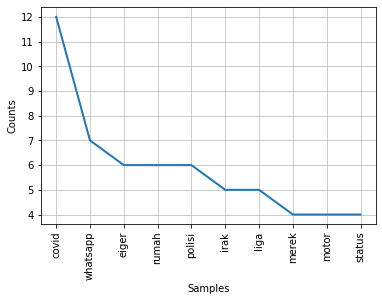

In [92]:
import matplotlib.pyplot as plt
fqdist.plot(10,cumulative=False)
plt.show()

In [94]:
final_text = ' '.join(kata_tanpa_stopwords)
final_text

'draf revisi uu pemilu menyebut pilkada serentak partai angka upayakan turun wiku eiger merek perlengkapan outdoor negeri relatif terkenal eiger merek lokal perlengkapan outdoor terkenal lifestyle pssi resmi menetapkan kongres tahunan pssi diselenggarakan tatap muka mei fabio quartararo memutuskan pebalap rossi mengendarai motor yzrm sukses juara dunia motogp penguasa pasar merek jepang terkesan berbicara rencana masuk pasar motor listrik pandemi motormotor lawas usianya tua harganya stabil habis tahap sosialisasi ditentukan tilang diberlakukan kota xiaomi permintaan maafnya pembeli asli poco m transaksinya dibatalkan flash sale januari pubg mobile kunjung dirilis diblokir india pengembang menelurkan fearless and united guards gantinya konsumen dipaksa metode bayar sistem lazada mengarahkan pembayaran poco m metode cod otomatis penyakit jantung koroner disebabkan penumpukan timbunan plak dinding arteri koroner jantung kondisi disebabkan feng shui mendekorasi rumah tujuan menciptakan ru

## WordCloud

In [15]:
# import package 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
print ('Wordcloud is installed and imported!')


Wordcloud is installed and imported!


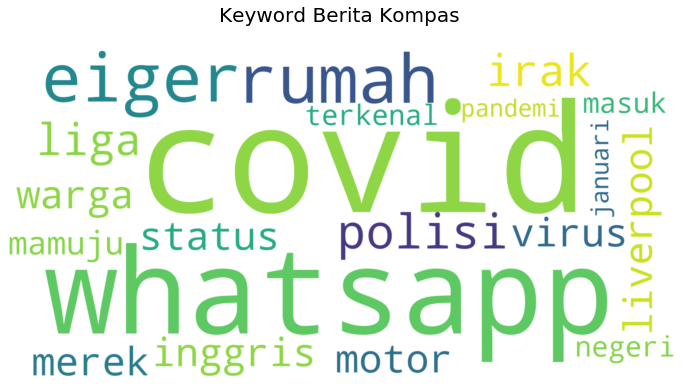

In [96]:
wc = WordCloud(width=1600, height=800, background_color="white", max_words=20, stopwords=list_stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(final_text)

# show
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Keyword Berita Kompas \n', fontsize= 20)
plt.show()